In [0]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os, shutil
import zipfile
import pandas as pd

In [0]:
%%time
base_path = 'drive/My Drive/datasets/dc_dataset'
train_file_name = 'train.zip'

# file = zipfile.ZipFile(os.path.join(base_path, train_file_name))
# file.extractall(base_path)
  
# file.close()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs



# Removing files into correct folders

In [0]:
%%time
type_folder = 'test'

# source = os.path.join(base_path, type_folder)
# destination_cats = os.path.join(base_path, type_folder, 'cats')
# destination_dogs = os.path.join(base_path, type_folder, 'dogs')

# for file in os.listdir(os.path.join(base_path, type_folder)):
#   if 'cat' in file:
#     shutil.move(os.path.join(source,file), destination_cats)
#   elif 'dog' in file:
#     shutil.move(os.path.join(source,file), destination_dogs)
#   else:
#     pass

CPU times: user 97.4 ms, sys: 133 ms, total: 230 ms
Wall time: 5.57 s


In [0]:
len(os.listdir(os.path.join(base_path, 'test')))

2

In [0]:
len(os.listdir(os.path.join(base_path,'val')))

1000

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), batch_size=20, class_mode='binary')

val_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
len(os.listdir(train_dir))

2000

In [0]:
%%time
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 15s 147ms/step - loss: 0.3982 - acc: 0.8170 - val_loss: 0.5502 - val_acc: 0.7120
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 0.3686 - acc: 0.8455 - val_loss: 0.5666 - val_acc: 0.7090
Epoch 3/30
100/100 [==============================] - 13s 134ms/step - loss: 0.3482 - acc: 0.8565 - val_loss: 0.5758 - val_acc: 0.7130
Epoch 4/30
100/100 [==============================] - 14s 136ms/step - loss: 0.3190 - acc: 0.8630 - val_loss: 0.5856 - val_acc: 0.7340
Epoch 5/30
100/100 [==============================] - 14s 135ms/step - loss: 0.2937 - acc: 0.8760 - val_loss: 0.5882 - val_acc: 0.7330
Epoch 6/30
100/100 [==============================] - 13s 135ms/step - loss: 0.2724 - acc: 0.8915 - val_loss: 0.6057 - val_acc: 0.7210
Epoch 7/30
100/100 [==============================] - 13s 135ms/step - loss: 0.2453 - acc: 0.8995 - val_loss: 0.6833 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 1

# Loss and Accuracy Plots

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

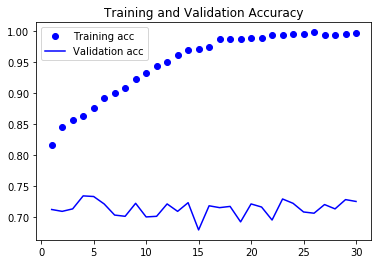

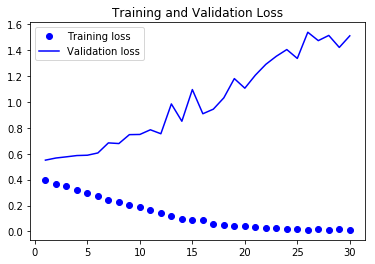

In [0]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Data Aumentation

In [0]:
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

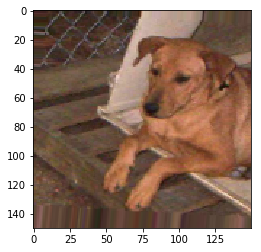

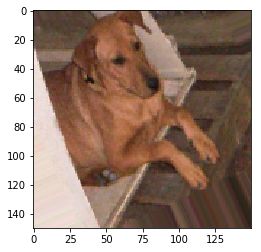

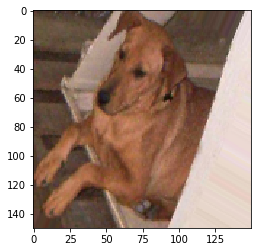

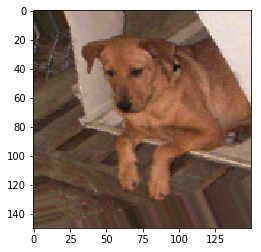

In [0]:
from keras.preprocessing import image

train_dogs_dir = os.path.join(train_dir,'dogs')

fnames = [os.path.join(train_dogs_dir,fname) for fname in os.listdir(train_dogs_dir)]

img_path = fnames[20]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0

for batch in datagen.flow(x, batch_size=1):
  plt.figure()
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break
    
plt.show()

# Facing Overfitting

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
%%time
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), batch_size=32, class_mode='binary')

val_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=val_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 40s 402ms/step - loss: 0.6908 - acc: 0.5144 - val_loss: 0.6755 - val_acc: 0.5774
Epoch 2/100
100/100 [==============================] - 37s 365ms/step - loss: 0.6775 - acc: 0.5578 - val_loss: 0.6808 - val_acc: 0.5213
Epoch 3/100
100/100 [==============================] - 36s 359ms/step - loss: 0.6653 - acc: 0.5869 - val_loss: 0.6479 - val_acc: 0.5971
Epoch 4/100
100/100 [==============================] - 36s 360ms/step - loss: 0.6487 - acc: 0.6147 - val_loss: 0.6138 - val_acc: 0.6585
Epoch 5/100
100/100 [==============================] - 35s 350ms/step - loss: 0.6312 - acc: 0.6350 - val_loss: 0.6690 - val_acc: 0.5825
Epoch 6/100
100/100 [==============================] - 38s 385ms/step - loss: 0.6180 - acc: 0.6566 - val_loss: 0.6052 - val_acc: 0.6476
Epoch 7/100
100/100 [==============================] - 36s 362ms/step - loss: 0.6089 - acc: 0.6637 -

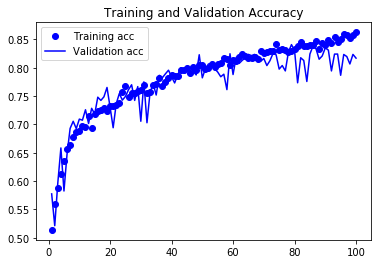

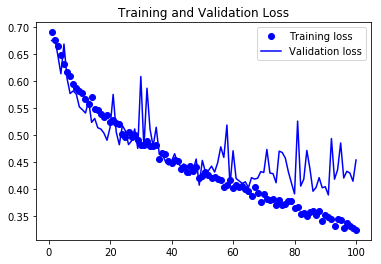

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()